In [ ]:
#Case 2
#Jorma Männistö, Helsinki Metropolia University of Applied Sciences 
#Last edited: 25.02.2018
#The objective of this assignment is apply and utilize keras-library in order to use convolutional neural networks to 
#classify medical images for diabetic
#retinopathy images. 

In [9]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models

%matplotlib inline

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [12]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [13]:
# Data preprocessing

from keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:\\Users\\Salme\\Documents\\retinopathy\\dataset2\\train'
validation_dir = 'C:\\Users\\Salme\\Documents\\retinopathy\\dataset2\\validation'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 1927 images belonging to 2 classes.
Found 1011 images belonging to 2 classes.


In [14]:
# Testing 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


In [15]:
labels_batch

array([ 1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

In [16]:
# Modeling
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 100, #(amount of images divided by batch size, which should be ~200, but in this case we'll reduce the value to 100 in order to conserve time)
      verbose = 1,
      epochs = 30,
      validation_data = validation_generator,
      validation_steps = 5)

Epoch 1/30
100/100 [==============================] - 238s 2s/step - loss: 0.5554 - acc: 0.7116 - val_loss: 0.5334 - val_acc: 0.7800
Epoch 2/30
100/100 [==============================] - 217s 2s/step - loss: 0.5201 - acc: 0.7410 - val_loss: 0.4718 - val_acc: 0.7800
Epoch 3/30
100/100 [==============================] - 215s 2s/step - loss: 0.5139 - acc: 0.7476 - val_loss: 0.4161 - val_acc: 0.7600
Epoch 4/30
100/100 [==============================] - 215s 2s/step - loss: 0.5205 - acc: 0.7480 - val_loss: 0.4345 - val_acc: 0.8200
Epoch 5/30
100/100 [==============================] - 216s 2s/step - loss: 0.4813 - acc: 0.7666 - val_loss: 0.3940 - val_acc: 0.8200
Epoch 6/30
100/100 [==============================] - 218s 2s/step - loss: 0.4983 - acc: 0.7460 - val_loss: 0.3567 - val_acc: 0.8400
Epoch 7/30
100/100 [==============================] - 215s 2s/step - loss: 0.4689 - acc: 0.7530 - val_loss: 0.3410 - val_acc: 0.8200
Epoch 8/30
100/100 [==============================] - 217s 2s/step - 

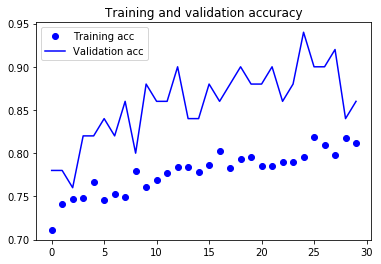

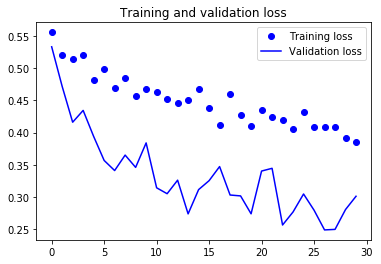

In [17]:
# Results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Conlusion
# With such settings training accuracy reaches and varies between approximately 80-90%, 
# with validation loss being well below 40%. Such results prove to be fairly accurate, in which case training the neural network to
# recognize images with diabetic retinopathy proves to fairly succesful.

